In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [3]:
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv("cumulative.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
df.koi_disposition

0            CONFIRMED
1            CONFIRMED
2       FALSE POSITIVE
3       FALSE POSITIVE
4            CONFIRMED
             ...      
9559    FALSE POSITIVE
9560    FALSE POSITIVE
9561         CANDIDATE
9562    FALSE POSITIVE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 9564, dtype: object

In [6]:
df.koi_pdisposition

0            CANDIDATE
1            CANDIDATE
2       FALSE POSITIVE
3       FALSE POSITIVE
4            CANDIDATE
             ...      
9559    FALSE POSITIVE
9560    FALSE POSITIVE
9561         CANDIDATE
9562    FALSE POSITIVE
9563    FALSE POSITIVE
Name: koi_pdisposition, Length: 9564, dtype: object

In [7]:
ds = df.assign(n=0).groupby(['koi_pdisposition']).n.count()
ds

koi_pdisposition
CANDIDATE         4496
FALSE POSITIVE    5068
Name: n, dtype: int64

In [8]:
da = df.assign(n = 0).groupby(["koi_disposition"]).n.count()
da

koi_disposition
CANDIDATE         2248
CONFIRMED         2293
FALSE POSITIVE    5023
Name: n, dtype: int64

<AxesSubplot:title={'center':'Planetas candidatos, falso positivo, confirmado'}, xlabel='Falsos positivos', ylabel='Candidatos'>

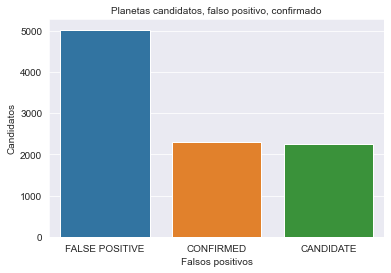

In [9]:
ax = sns.barplot(df['koi_disposition'].value_counts().index, df['koi_disposition'].value_counts().values)
ax.set_title("Planetas candidatos, falso positivo, confirmado", fontsize=10);
ax.set_ylabel('Candidatos', fontsize=10)
ax.set_xlabel("Falsos positivos", fontsize=10)
ax

<AxesSubplot:title={'center':'Planetas candidatos e falsos positivos'}, xlabel='Falsos positivos', ylabel='Candidatos'>

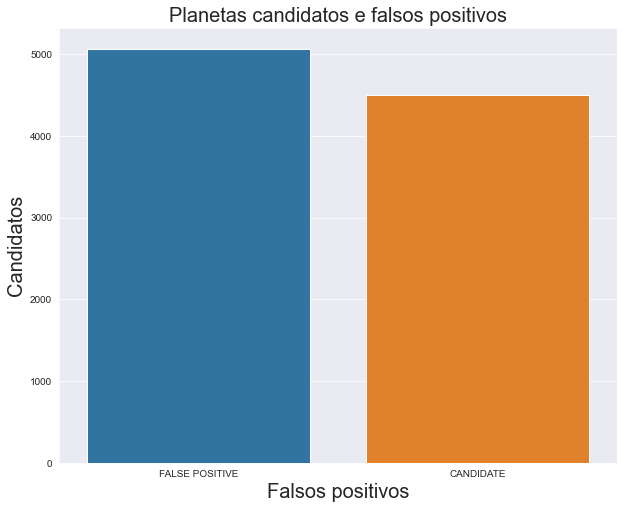

In [10]:
ax = sns.barplot(df['koi_pdisposition'].value_counts().index, df['koi_pdisposition'].value_counts().values)
ax.figure.set_size_inches(10, 8)
ax.set_title("Planetas candidatos e falsos positivos", fontsize=20);
ax.set_ylabel('Candidatos', fontsize=20)
ax.set_xlabel("Falsos positivos", fontsize=20)
ax

<AxesSubplot:title={'center':'Planetas e Estrela'}, xlabel='Estrela', ylabel='Planetas'>

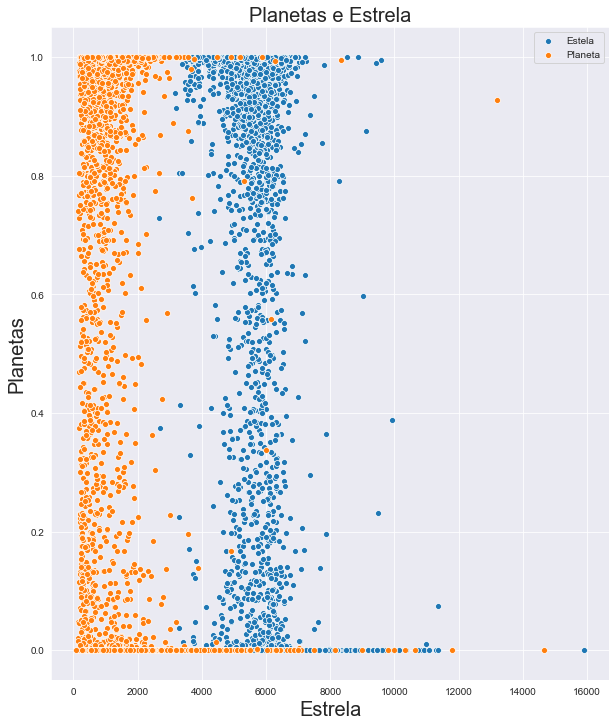

In [11]:
ax = sns.scatterplot(x = "koi_steff", y = "koi_score", data=df, label = "Estela")
ax.figure.set_size_inches(10, 12)
ax = sns.scatterplot(x = "koi_teq", y = "koi_score", data=df, label = "Planeta")
ax.figure.set_size_inches(10, 12)
ax.set_title("Planetas e Estrela", fontsize=20);
ax.set_ylabel('Planetas', fontsize=20)
ax.set_xlabel("Estrela", fontsize=20)
ax

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


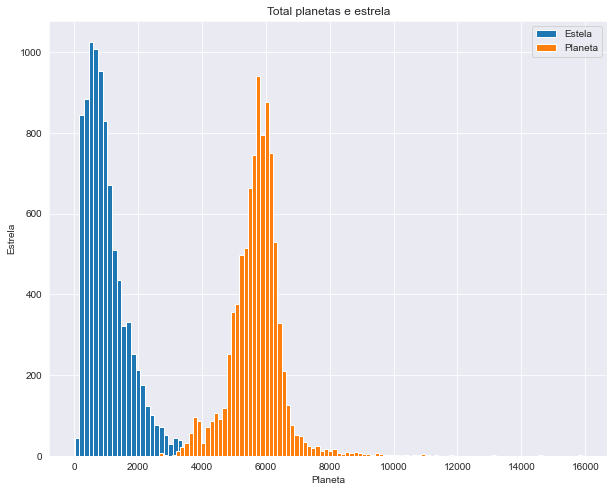

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(df["koi_teq"], bins = 100, label = "Estela");
plt.hist(df["koi_steff"], bins =100, label = "Planeta");
plt.title("Total planetas e estrela")
plt.xlabel("Planeta")
plt.ylabel("Estrela")
plt.legend()

**Cluster**

In [13]:
pl = df.kepoi_name.str.get_dummies()
pl2 = df.koi_disposition.str.get_dummies()

In [14]:
pl2

,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
9559,0,0,1
9560,0,0,1
9561,1,0,0
9562,0,0,1


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
planetas = scaler.fit_transform(pl, pl2)
planetas

array([[-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593],
       [-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593],
       [-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593],
       ...,
       [-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593],
       [-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593],
       [-0.01022593, -0.01022593, -0.01022593, ..., -0.01022593,
        -0.01022593, -0.01022593]])

# K-Means

In [16]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 200)
modelo.fit(planetas)
print(modelo.cluster_centers_)

[[-0.01022593 -0.01022593 -0.01022593 ...  0.03007107 -0.01022593
  -0.01022593]
 [-0.01022593 -0.01022593  0.01483835 ... -0.01022593 -0.01022593
  -0.01022593]
 [-0.01022593 -0.01022593 -0.01022593 ... -0.01022593 -0.01022593
  -0.01022593]
 ...
 [-0.01022593 -0.01022593 -0.01022593 ... -0.01022593 -0.01022593
  -0.01022593]
 [-0.01022593 -0.01022593 -0.01022593 ... -0.01022593 -0.01022593
  -0.01022593]
 [-0.01022593 -0.01022593 -0.01022593 ... -0.01022593 -0.01022593
  -0.01022593]]


In [17]:
planetas = pd.DataFrame(modelo.cluster_centers_, columns = pl.columns)
planetas

,K00001.01,K00002.01,K00003.01,K00004.01,K00005.01,K00005.02,K00006.01,K00007.01,K00008.01,K00009.01,...,K08288.01,K08289.01,K08290.01,K08291.01,K08292.01,K08293.01,K08294.01,K08295.01,K08296.01,K08297.01
0,-0.010226,-0.010226,-0.010226,0.030071,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,0.030071,-0.010226,-0.010226
1,-0.010226,-0.010226,0.014838,-0.010226,-0.010226,0.014838,0.014838,0.014838,-0.010226,0.014838,...,0.014838,0.014838,0.014838,0.014838,0.014838,0.014838,-0.010226,-0.010226,-0.010226,-0.010226
2,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
3,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
4,0.021967,0.021967,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,0.021967,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,0.021967,-0.010226,0.021967,0.021967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
196,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
197,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
198,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226


In [18]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(planetas)
visualizacao

array([[-3.22957337e-01,  9.07097816e+00],
       [ 4.84069109e+00, -6.32578421e+00],
       [ 1.10202461e+02,  1.06080597e+02],
       [ 4.55561600e+01, -3.02670898e+01],
       [ 1.53785477e+01,  6.15307331e+00],
       [ 3.54806786e+01,  1.03461166e+02],
       [-3.80685158e+01,  1.62421402e+02],
       [ 4.23616295e+01,  4.41666451e+01],
       [-6.04374771e+01,  1.32894562e+02],
       [-5.61033249e+01,  2.06484283e+02],
       [ 1.85697052e+02, -5.58201294e+01],
       [ 3.87153816e+01,  1.70892715e+01],
       [ 2.79976013e+02,  8.41109161e+01],
       [ 1.14018234e+02,  5.55294991e+01],
       [ 2.14336838e+02,  8.54335403e+01],
       [ 1.99615524e+02,  1.30307169e+01],
       [ 2.64258327e+01,  1.36096405e+02],
       [ 9.96992340e+01, -1.21814775e+01],
       [-2.16635876e+01,  2.32897156e+02],
       [ 2.19837494e+02, -1.74263458e+01],
       [ 2.13904022e+02,  1.31306320e+02],
       [ 1.54304962e+02, -8.43799820e+01],
       [ 5.26541862e+01,  1.58818909e+02],
       [ 1.

In [19]:
modelo = KMeans(n_clusters=200)
modelo.fit(planetas)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=planetas.columns)
grupos.head()

,K00001.01,K00002.01,K00003.01,K00004.01,K00005.01,K00005.02,K00006.01,K00007.01,K00008.01,K00009.01,...,K08288.01,K08289.01,K08290.01,K08291.01,K08292.01,K08293.01,K08294.01,K08295.01,K08296.01,K08297.01
0,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
1,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
2,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
3,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
4,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226


In [20]:
modelo = KMeans(n_clusters=200)
modelo.fit(planetas)
grupos = pd.DataFrame(modelo.cluster_centers_, columns = planetas.columns)
grupos

,K00001.01,K00002.01,K00003.01,K00004.01,K00005.01,K00005.02,K00006.01,K00007.01,K00008.01,K00009.01,...,K08288.01,K08289.01,K08290.01,K08291.01,K08292.01,K08293.01,K08294.01,K08295.01,K08296.01,K08297.01
0,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
1,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
2,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
3,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
4,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
196,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
197,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226
198,-0.010226,-0.010226,-0.010226,0.030071,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,...,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,-0.010226,0.030071,-0.010226,-0.010226


<AxesSubplot:ylabel='Frequency'>

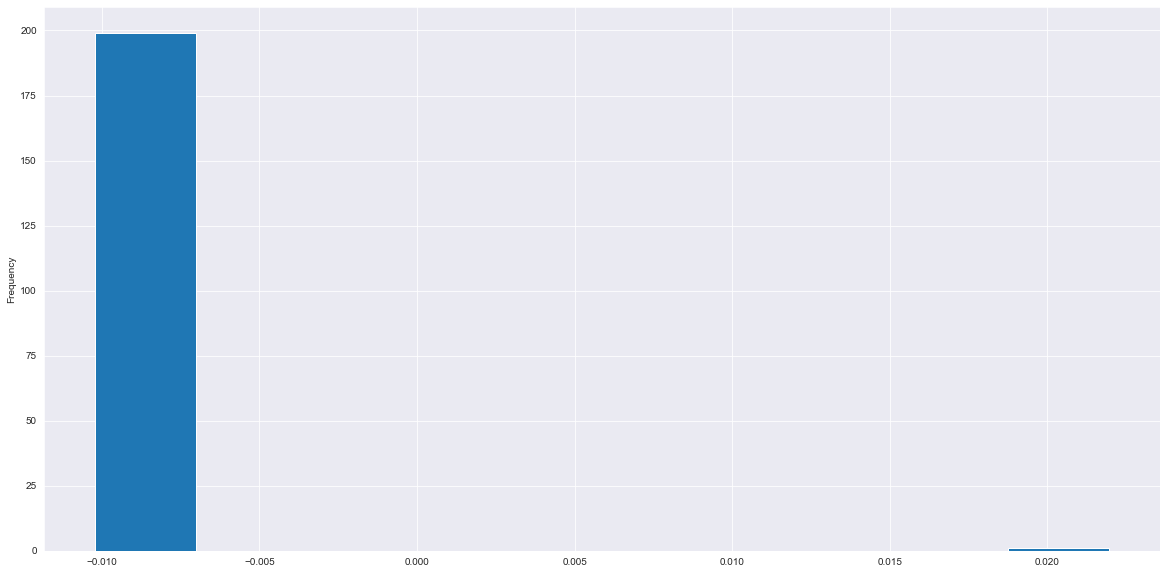

In [21]:
plt.figure(figsize=(20, 10))
grupos["K00001.01"].plot.hist()

# Agrupamento hierárquico

In [22]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=200)
grupos = modelo.fit_predict(planetas)
grupos

array([198, 199, 191, 188, 128, 189, 187,  93, 185, 186, 195,  92, 177,
       184, 183, 178, 146, 176, 175, 145, 174, 173,  91, 181, 172, 192,
       144, 143, 171, 179, 142, 141, 182, 170, 169,  88, 168, 140, 167,
        87,  86,  85,  84, 139,  83, 166, 165, 163, 161, 159, 196, 138,
       190,  82, 157, 155, 153, 151, 137, 149, 136, 135, 147,  72, 134,
       133, 164, 132,  71,  70,  69, 131,  68,  67,  66,  65,  90,  81,
        94, 129, 127, 125, 123, 121, 194, 162, 119,  80, 117, 130, 115,
       113, 160,  64, 111, 109, 122, 107, 105, 103, 180, 101,  99,  79,
        97, 193,  46,  45,  96,  60,  89,  43,  42, 158,  78, 120,  59,
        41,  40,  39, 118,  58, 116,  57, 156,  77, 152,  38, 154, 148,
        35,  76, 114,  56,  75, 112,  34,  33,  32,  44,  55,  63,  37,
       150, 110, 124,  29,  74,  54, 108,  53, 197,  28, 106,  52,  27,
        26, 104,  95,  51, 100,  73,  47,  25,  31, 102,  36,  22,  18,
        17,  21,  50,  49,  16,  15,  61,  13,  12,   7,  20,  9

In [23]:
tsne = TSNE()
visualizacao = tsne.fit_transform(planetas)
visualizacao

array([[  2.4911122 ,   1.6709895 ],
       [  6.3392153 ,   5.260395  ],
       [ 56.1146    , -70.097244  ],
       [ 69.00755   , -62.559483  ],
       [  1.3842225 ,   6.759883  ],
       [ 44.20805   , -40.67612   ],
       [ 78.676025  , -46.57153   ],
       [ 23.817303  ,   2.6105099 ],
       [ 16.77807   , -37.604237  ],
       [ 27.110067  ,  -6.5814443 ],
       [  4.680364  , -49.168083  ],
       [ 72.642654  , -25.967909  ],
       [ -3.3550994 , -22.45387   ],
       [ 24.975489  , -32.022648  ],
       [ -7.6851535 , -52.40886   ],
       [ 62.850716  ,   8.793378  ],
       [ 36.930515  ,  27.35779   ],
       [ -3.7610128 , -74.57172   ],
       [ 28.05606   ,  18.69244   ],
       [ 25.694178  , -42.88919   ],
       [ 55.370148  ,  35.97971   ],
       [ 31.990103  , -87.3227    ],
       [ 33.881214  , -58.84955   ],
       [ 20.61245   ,  11.523018  ],
       [ 83.75484   , -18.141275  ],
       [ 66.22542   , -49.27625   ],
       [ 42.478188  , -30.098589  ],
 

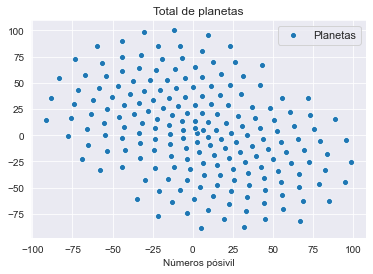

In [24]:
plt.title("Total de planetas")
plt.xlabel("Números pósivil")
ax = sns.set(rc={'figure.figsize':(13, 13)})
ax = sns.scatterplot(x = visualizacao[:, 0],
                y = visualizacao[:, 1],
               label = "Planetas")

<AxesSubplot:xlabel='Total de planetas candidatos'>

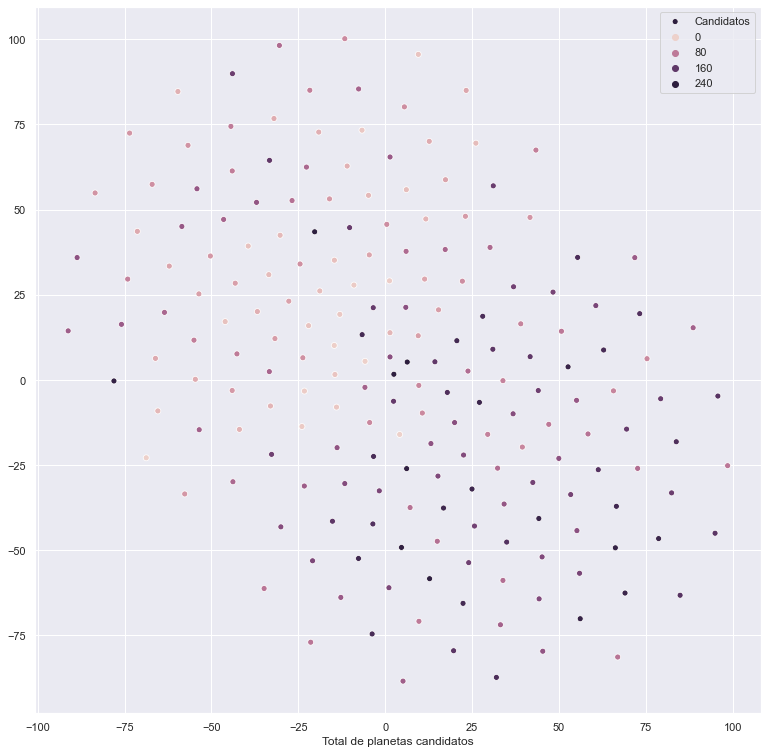

In [25]:
plt.xlabel("Total de planetas candidatos")
sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:,1],
               hue = grupos, 
               label ="Candidatos")

<AxesSubplot:title={'center':'Total de planetas e estrelas'}, xlabel='Total de estrelas', ylabel='Toal de planetas'>

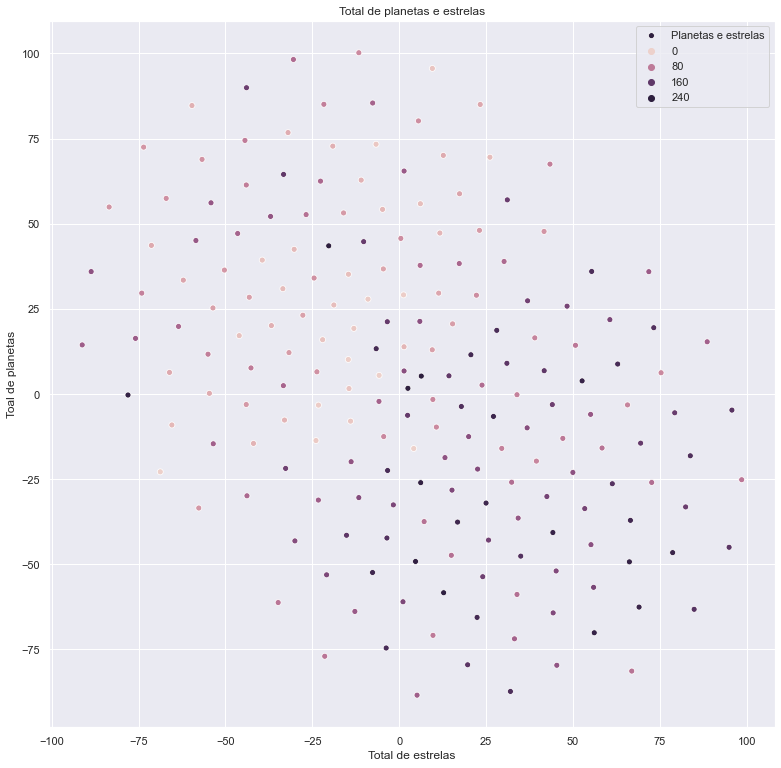

In [26]:
plt.title("Total de planetas e estrelas")
plt.xlabel("Total de estrelas")
plt.ylabel("Toal de planetas")
sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:,1],
               hue = grupos, label = "Planetas e estrelas")